## Задание к занятию «Временные ряды, общая теория» - часть1
Дмитрий Каннуников

Описание задания:
Найти на сайте 2 временных ряда, которые больше всего понравятся и сделать их стационарными. Работу оформить, как сделано в шаблоне "Пример полноценного анализа".

In [109]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [110]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [111]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## Самый высокий среднимесячный уровень реки Мичеган

In [112]:
series = pd.read_csv("./data/highest-mean-monthly-level-lake-Michigan.csv")['Highest_mean']

Results of Dickey-Fuller Test:
Test Statistic                 -2.730668
p-value                         0.068880
#Lags Used                      2.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64


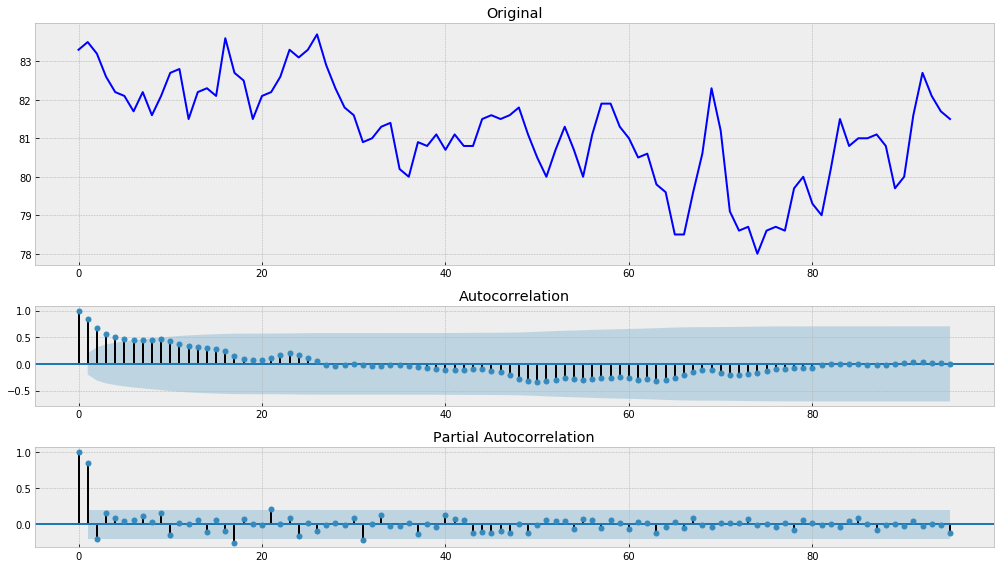

In [113]:
tsplot(series)

Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Для начала сделаем преобразования Бокса-Кокса

In [114]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -2.721997
p-value                         0.070309
#Lags Used                      2.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64


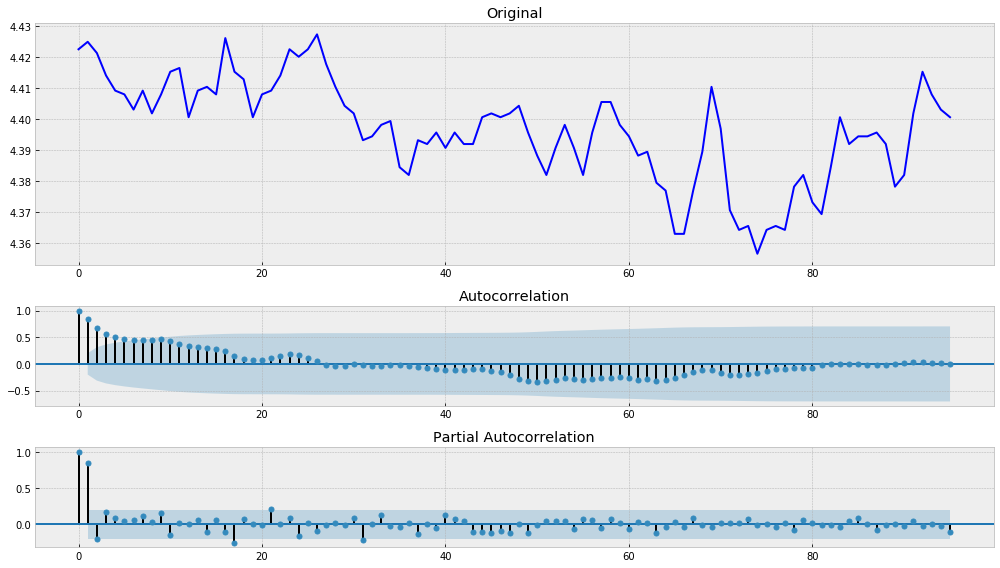

In [115]:
tsplot(series)

Нам удалось убрать размах дисперсии, но по графику ряда видно наличие тренда. Уберем его дифференцированием.

In [116]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -8.255245e+00
p-value                        5.258631e-13
#Lags Used                     1.000000e+00
Number of Observations Used    9.300000e+01
Critical Value (1%)           -3.502705e+00
Critical Value (5%)           -2.893158e+00
Critical Value (10%)          -2.583637e+00
dtype: float64


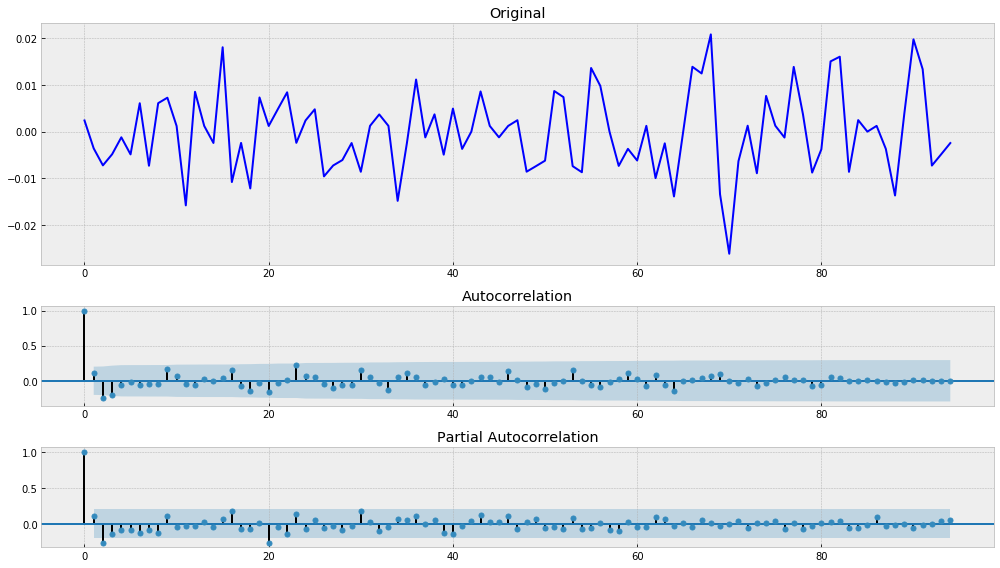

In [117]:
tsplot(series)

Тест Дики-Фуллера отвергает гипотезу о нестационарности ряда